In [1]:
pip install python-binance

  Using cached python_binance-1.0.16-py2.py3-none-any.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.3/360.3 kB 8.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 4.9 MB/s eta 0:00:00
  Using cached dateparser-1.1.7-py2.py3-none-any.whl (293 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.5 MB/s eta 0:00:00
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
  Using cached tzlocal-4.2-py3-none-any.whl (19 kB)
  Using cached pytz_deprecation_shim-0.1.0.post0-py2.py3-none-any.whl (15 kB)
  Using cached tzdata-2022.7-py2.py3-none-any.whl (340 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29088 sha256=ef3285b7fd0cb5584a66fb11ad0b36d465b008a41f614ba067dd47d2b654da06
  Stored in directory: /Users/juanbraco/Library/Caches/pip/wheels/6a/76/03/7f785aaa50b9c6ec7e3fd105a62c1b2c45a034512d51e024a9
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
from binance.client import Client
import ta
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [29]:
klinesT = Client().get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1HOUR, "01 January 2017")
df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])

In [30]:
del df['ignore']
del df['close_time']
del df['quote_av']
del df['trades']
del df['tb_base_av']
del df['tb_quote_av']

df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])
print(df)

           timestamp      open      high       low     close          volume
0      1502942400000   4261.48   4313.62   4261.32   4308.83     47.18100900
1      1502946000000   4308.83   4328.69   4291.37   4315.32     23.23491600
2      1502949600000   4330.29   4345.45   4309.37   4324.35      7.22969100
3      1502953200000   4316.62   4349.99   4287.41   4349.99      4.44324900
4      1502956800000   4333.32   4377.85   4333.32   4360.69      0.97280700
...              ...       ...       ...       ...       ...             ...
48196  1676905200000  24970.00  25100.00  24860.00  24942.87  23628.01054000
48197  1676908800000  24942.87  24957.32  24622.00  24884.20  26394.82918000
48198  1676912400000  24883.03  24906.38  24761.87  24810.05  12440.01224000
48199  1676916000000  24810.51  24842.06  24750.00  24819.67   9160.07649000
48200  1676919600000  24820.46  24888.23  24803.39  24848.59   4708.23653000

[48201 rows x 6 columns]


In [31]:
df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')

del df['timestamp']
print(df)

                         open      high       low     close          volume
timestamp                                                                  
2017-08-17 04:00:00   4261.48   4313.62   4261.32   4308.83     47.18100900
2017-08-17 05:00:00   4308.83   4328.69   4291.37   4315.32     23.23491600
2017-08-17 06:00:00   4330.29   4345.45   4309.37   4324.35      7.22969100
2017-08-17 07:00:00   4316.62   4349.99   4287.41   4349.99      4.44324900
2017-08-17 08:00:00   4333.32   4377.85   4333.32   4360.69      0.97280700
...                       ...       ...       ...       ...             ...
2023-02-20 15:00:00  24970.00  25100.00  24860.00  24942.87  23628.01054000
2023-02-20 16:00:00  24942.87  24957.32  24622.00  24884.20  26394.82918000
2023-02-20 17:00:00  24883.03  24906.38  24761.87  24810.05  12440.01224000
2023-02-20 18:00:00  24810.51  24842.06  24750.00  24819.67   9160.07649000
2023-02-20 19:00:00  24820.46  24888.23  24803.39  24848.59   4708.23653000

[48201 rows

In [32]:
df['SMA200'] = ta.trend.sma_indicator(df['close'], 200)
df['SMA600'] = ta.trend.sma_indicator(df['close'], 600)
print(df)

                         open      high       low     close          volume  \
timestamp                                                                     
2017-08-17 04:00:00   4261.48   4313.62   4261.32   4308.83     47.18100900   
2017-08-17 05:00:00   4308.83   4328.69   4291.37   4315.32     23.23491600   
2017-08-17 06:00:00   4330.29   4345.45   4309.37   4324.35      7.22969100   
2017-08-17 07:00:00   4316.62   4349.99   4287.41   4349.99      4.44324900   
2017-08-17 08:00:00   4333.32   4377.85   4333.32   4360.69      0.97280700   
...                       ...       ...       ...       ...             ...   
2023-02-20 15:00:00  24970.00  25100.00  24860.00  24942.87  23628.01054000   
2023-02-20 16:00:00  24942.87  24957.32  24622.00  24884.20  26394.82918000   
2023-02-20 17:00:00  24883.03  24906.38  24761.87  24810.05  12440.01224000   
2023-02-20 18:00:00  24810.51  24842.06  24750.00  24819.67   9160.07649000   
2023-02-20 19:00:00  24820.46  24888.23  24803.39  2

In [25]:
usdt = 1000
btc = 0
lastIndex = df.first_valid_index()

for index, row in df.iterrows():
  if df['SMA200'][lastIndex] > df['SMA600'][lastIndex] and usdt > 10:
    btc = usdt / df['close'][index] 
    btc = btc - 0.001 * btc
    usdt = 0
    print("Buy BTC at",df['close'][index],'$ the', index)

  if df['SMA200'][lastIndex] < df['SMA600'][lastIndex] and btc > 0.0001:
    usdt = btc * df['close'][index]
    usdt = usdt - 0.001 * usdt
    btc = 0
    print("Sell BTC at",df['close'][index],'$ the', index)
  lastIndex = index

Buy BTC at 4176.24 $ the 2017-09-11 10:00:00
Sell BTC at 4259.44 $ the 2017-09-12 13:00:00
Buy BTC at 4302.02 $ the 2017-10-01 08:00:00
Sell BTC at 16351.02 $ the 2017-12-27 05:00:00
Buy BTC at 14219.61 $ the 2018-01-10 06:00:00
Sell BTC at 14195.0 $ the 2018-01-15 12:00:00
Buy BTC at 11082.94 $ the 2018-02-19 18:00:00
Sell BTC at 8704.0 $ the 2018-03-11 07:00:00
Buy BTC at 8018.98 $ the 2018-04-16 21:00:00
Sell BTC at 8665.97 $ the 2018-05-14 00:00:00
Buy BTC at 6584.36 $ the 2018-07-07 10:00:00
Sell BTC at 7087.99 $ the 2018-08-07 11:00:00
Buy BTC at 6902.74 $ the 2018-08-28 04:00:00
Sell BTC at 6355.0 $ the 2018-09-11 03:00:00
Buy BTC at 6669.36 $ the 2018-09-27 19:00:00
Sell BTC at 6309.02 $ the 2018-10-12 22:00:00
Buy BTC at 6573.58 $ the 2018-10-20 10:00:00
Sell BTC at 6491.85 $ the 2018-10-28 10:00:00
Buy BTC at 4125.4 $ the 2018-12-24 04:00:00
Sell BTC at 3588.24 $ the 2019-01-13 02:00:00
Buy BTC at 3626.58 $ the 2019-02-12 04:00:00
Sell BTC at 7660.98 $ the 2019-06-09 18:00:00

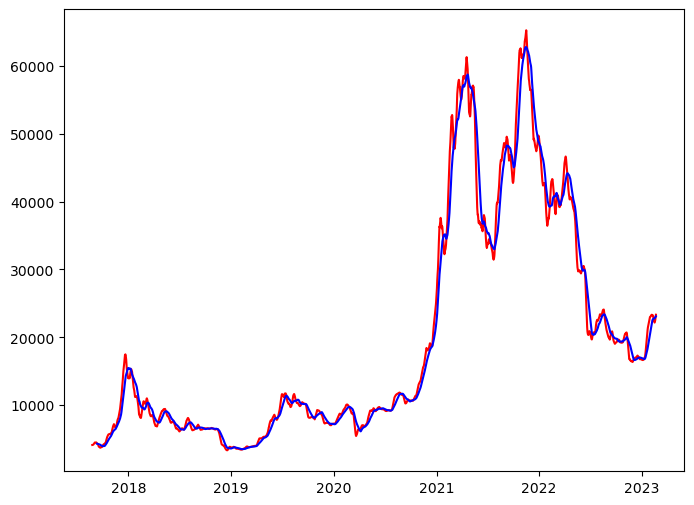

In [24]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.plot(df.index, df.SMA200, label="", color="red")
ax.plot(df.index, df.SMA600, label="", color="blue")

In [26]:
finalResult = usdt + btc * df['close'].iloc[-1]
print("Final result",finalResult,'USDT')

Final result 21108.03055911317 USDT


In [27]:
print("Buy and hold result", (1000 / df['close'].iloc[0]) * df['close'].iloc[-1],'USDT')

Buy and hold result 5679.8643715347325 USDT
